#  problem 2.1

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils import Bunch
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from re import T
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix ,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.lines as mlines
from sklearn.feature_selection import f_classif
le = preprocessing.LabelEncoder()



In [2]:
def plotData(features, labels, cls, class_names):
  colors = ['r', 'b', 'g']
  markers = ['o', '*', '+']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "DUMD Dataset with {n} classes".format(n=int(len(cls)))
  plt.title(Title)
  plt.xlabel(' PEG')
  plt.ylabel(' LPR ')
  plt.legend()

In [3]:
def plotRegions(model, X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

In [4]:
def choseing_2f(X,y):
  test = SelectKBest(score_func=f_classif, k=2)
  fit = test.fit(X, y)
  X_new=test.fit_transform(X, y)
  print(fit.scores_)
  return X_new



In [5]:
def new_tranin(X,y):
  NewX=choseing_2f(X,y)
  X_train, X_test, y_train, y_test = train_test_split(NewX, y, test_size = 0.20, random_state = 0)
  model = GaussianNB()

  model.fit(X_train, y_train)
  class_names={0: 'Class_0', 1: 'Class_1', 2: 'Class_2'}
  cls_new=[0,1,2]
  plotData(X_test, y_test, cls_new, class_names)
  plotRegions(model, X_test)
  plt.legend(loc="upper left")
  plt.show()




In [6]:
data = load_wine()
X=data.data
y=data.target

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [8]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

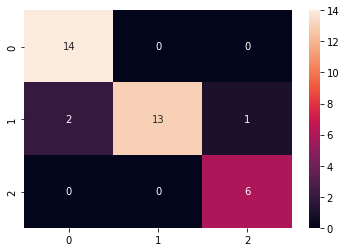

In [10]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)


In [11]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       0.88      1.00      0.93        14
     class_1       1.00      0.81      0.90        16
     class_2       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



[135.07762424  36.94342496  13.3129012   35.77163741  12.42958434
  93.73300962 233.92587268  27.57541715  30.27138317 120.66401844
 101.31679539 189.97232058 207.9203739 ]


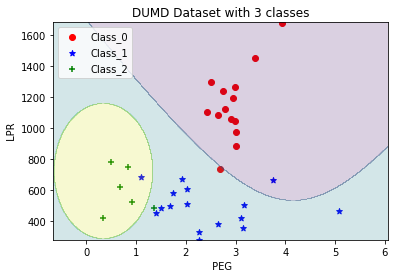

In [12]:
new_tranin(X,y)

# Problem 2.2

In [13]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils import Bunch
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from re import T
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix ,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.lines as mlines
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score 
from datetime import datetime as dt
import timeit


In [14]:
def rename_cul(data,name):
  data.columns =name

  return data

In [15]:
def getAccuracy(model, x, y):
  y_pred=model.predict(x)

  return accuracy_score(y, y_pred)*100

In [16]:
def label_the_data(data):
  le = preprocessing.LabelEncoder()

  for i in range(len(data.columns)):
    data.iloc[:,i]=le.fit_transform(data.iloc[:,i])
  return data



In [17]:
def geting_thedatareaady(data):
  data[0]=data[0].replace({'low':'a',"med":'b',"high":'c',"vhigh":'d'})
  data[1]=data[1].replace({'low':'a',"med":'b',"high":'c',"vhigh":'d'})
  data[2]=data[2].replace({'5more':'6'})
  data[3]=data[3].replace({'more':'6'})
  data[4]=data[4].replace({'small':'a',"med":'b',"big":'c'})
  data[5]=data[5].replace({'low':'a',"med":'b',"high":'c'})
  data[6]=data[6].replace({'unacc':'a',"acc":'b',"good":'c',"vgood":'d'})

  return data

In [18]:
def data_m_split(data):
  data= data.sample(frac=1).reset_index(drop=True)
  X_train=data.iloc[0:1000,:-1]
  y_train=data.iloc[0:1000,-1]
  X_val=data.iloc[1000:1300,:-1]
  y_val=data.iloc[1000:1300,-1]
  X_test=data.iloc[1300:1728,:-1]
  y_test=data.iloc[1300:1728,-1]

  return X_train ,y_train,X_val ,y_val,X_test ,y_test

In [19]:
def training_ntimes(X_train ,y_train,X_val ,y_val,X_test ,y_test ,num):
  models=[]
  valllist=[]
  testlist=[]
  for i in range(1,num+1):
    classifier = KNeighborsClassifier(n_neighbors = 2,metric='euclidean')
    model=classifier.fit(X_train[0:100*i], y_train[0:100*i])
    val=getAccuracy(model, X_val, y_val)
    
    test=getAccuracy(model, X_test, y_test)
    valllist.append(val)
    testlist.append(test)
  return models,valllist,testlist

In [20]:
def best_k(X_train ,y_train,X_val ,y_val,X_test ,y_test ,k_range):
# We can create Python dictionary using [] or dict()
  scores = []

  for k in range(1,k_range+1):
      knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
      knn.fit(X_train, y_train)
      y_pred = knn.predict(X_test)
      scores.append(accuracy_score(y_test, y_pred))

  return scores


In [21]:
def plot(val,test):
  x=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
  y_1=val
  y_2=test
  
  plt.plot(x, y_1 ,label='val accoure')
  plt.plot(x, y_2,label='test accoure')
  
  plt.title('All accuercy Vs valdition over parts of the traning')
  plt.xlabel('training data %')
  plt.ylabel('accuercy')
  plt.legend()
  plt.show()

In [22]:
def plotK(val):
  x=range(1,len(val)+1)
  y_1=val
  plt.plot(x, y_1,label='test accoure')
  
  plt.title('All accuercy Vs valdition over parts of the traning')
  plt.xlabel('n no.')
  plt.ylabel('accuercy')
  plt.legend()
  plt.show()

In [23]:
def timecalI(X_train ,y_train,i):
  classifier = KNeighborsClassifier(n_neighbors = i,metric='euclidean')
  model=classifier.fit(X_train, y_train)
  return model

  

    



In [24]:
def infcalI(model ,X_y):
  model.predict(X_y)
  

In [25]:
data =pd.read_csv('car_evaluation.csv',header=None)

In [26]:
data=geting_thedatareaady(data)

In [27]:
data=rename_cul(data,['buying price','maintenance cost','number of doors','number of persons','lug_boot','safety','decision'])

In [28]:
data=label_the_data(data)

In [29]:
data.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [30]:
X_train ,y_train,X_val ,y_val,X_test ,y_test=data_m_split(data)

In [31]:
models,vals,tests=training_ntimes(X_train ,y_train,X_val ,y_val,X_test ,y_test ,10)

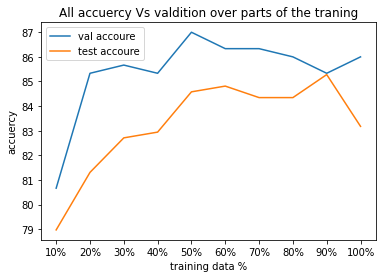

In [32]:
plot(vals,tests)

In [33]:
scores=best_k(X_train ,y_train,X_val ,y_val,X_test ,y_test ,10)

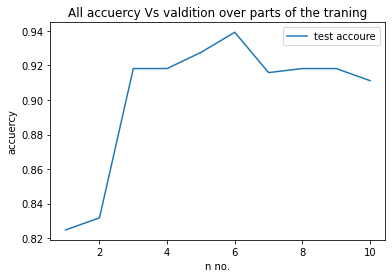

In [34]:
plotK(scores)

In [35]:
%timeit -o -n100 -r1  timecalI(X_train ,y_train,2 )

100 loops, best of 1: 4.33 ms per loop


<TimeitResult : 100 loops, best of 1: 4.33 ms per loop>

In [36]:
%timeit -o -n100 -r1   timecalI(X_train ,y_train,10 )


100 loops, best of 1: 3.31 ms per loop


<TimeitResult : 100 loops, best of 1: 3.31 ms per loop>

In [37]:
%timeit -o -n100  -r1  timecalI(X_train[:100] ,y_train[:100],2 )


100 loops, best of 1: 4.6 ms per loop


<TimeitResult : 100 loops, best of 1: 4.6 ms per loop>

In [38]:
%timeit -o -n100 -r1  timecalI(X_train[:100] ,y_train[:100],10 )

100 loops, best of 1: 2.74 ms per loop


<TimeitResult : 100 loops, best of 1: 2.74 ms per loop>

In [39]:
mo1=timecalI(X_train ,y_train,2 )
mo2=timecalI(X_train ,y_train,10 )
mo3=timecalI(X_train[:100] ,y_train[:100],2 )
mo4=timecalI(X_train[:100] ,y_train[:100],10 )

In [40]:
x1=%timeit -o -n10 -r1   infcalI(mo1 ,X_test)


10 loops, best of 1: 31.1 ms per loop


In [41]:
x2=%timeit -o -n10 -r1   infcalI(mo2 ,X_test)

10 loops, best of 1: 28.7 ms per loop


In [42]:
x3=%timeit -o -n10 -r1   infcalI(mo3 ,X_test)

10 loops, best of 1: 23.6 ms per loop


In [43]:
x4=%timeit -o -n10 -r1   infcalI(mo4 ,X_test)

10 loops, best of 1: 25.7 ms per loop


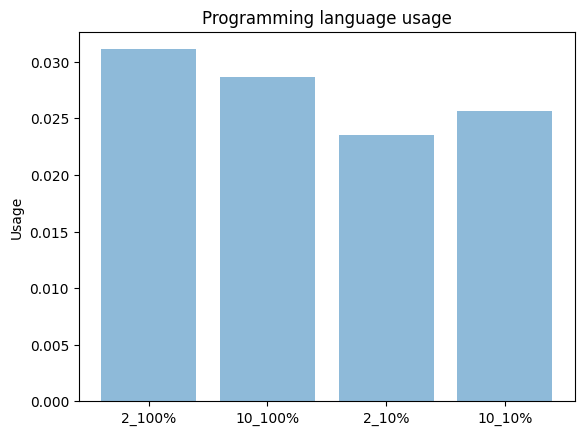

In [44]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('2_100%', '10_100%','2_10%', '10_10%' )
y_pos = np.arange(len(objects))
performance=[x1.worst,x2.worst,x3.worst,x4.worst]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()